### Monty Hall Problem

Reference: https://en.wikipedia.org/wiki/Monty_Hall_problem

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

In [37]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
def monty_hall_problem(n_doors=3, keep_choice=True):
    
    # Shuffle the doors
    doors = ['goat'] * (n_doors - 1) + ['car']
    random.shuffle(doors)
    
    # Choose the first element
    player_choice = doors[0]
    
    # Monty giving you some info
    # NOTE: Is it more likely to have a car with the
    # subset that Monty gives you info on, or the one
    # you first chose?
    # Probability(your choice contains car) = 1 / n_doors
    # Probability(one of the doors that you didn't choose contains car) = ((n_doors) - 1) / n_doors
    
    # It doesn't matter how I handle the list of doors
    if player_choice == 'car':
        doors = ['car', 'goat']
    else:
        doors = ['goat', 'car']
        

    def check_answer(player_choice):
        if player_choice == 'car':
#             print('You have won a brand new Telsa')
            return 1
        else:
#             print('You have found a goat....')
            return 0
    
    if keep_choice:
        is_correct = check_answer(player_choice)
    # Switch answer
    else:
        player_choice = doors[1]
        is_correct = check_answer(player_choice)
    return is_correct

In [57]:
# Run simulation
n_doors = 3
keep_choice = True
rounds = 100000

num_correct = 0
round_numbers = []
data_points = []
for round_number in range(1, rounds + 1):
    # Tally if the correct choice was made
    num_correct += monty_hall_problem(n_doors=n_doors, keep_choice=keep_choice)
    fraction_correct = num_correct / round_number
    round_numbers.append(round_number)
    data_points.append(fraction_correct)

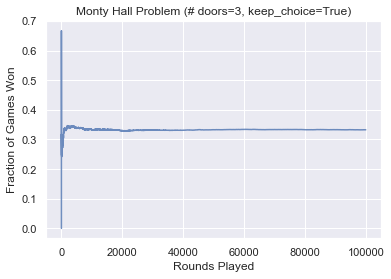

In [59]:
plt.plot(round_numbers, data_points, alpha=0.8)
plt.title(f'Monty Hall Problem (# doors={n_doors}, keep_choice={keep_choice})')
plt.xlabel('Rounds Played', fontsize=12)
plt.ylabel('Fraction of Games Won', fontsize=12)
plt.savefig('images/monty_hall_problem.png', dpi=200, bbox_inches='tight')
plt.show()